# 연습문제

## #01. 문제 1

아래 코드는 sklearn의 make_regression 함수를 사용하여 생성된 데이터셋을 기반으로 하는 선형회귀 분석에 관한 것이다.

이 데이터셋은 세개의 특성(x1, x2, x3)과 이에 해당하는 연속된 실수값인 타겟(target)을 포함하고 있다.

주어진 데이터셋을 이용하여 다음의 작업을 수행하라:

1. 주어진 데이터셋을 산점도로 시각화하고, 특성과 타겟 간의 관계를 시각적으로 분석하라.
2. 데이터를 학습(train)용과 테스트(test)용으로 나누고, 선형회귀 모델을 학습시키고,학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행한 후, 모델의 성능을 평가하라.
3. 위의 작업을 완료한 후 결과를 보고하라.

```python
from sklearn.datasets import make_regression
from pandas import DataFrame

X, Y = make_regression(n_samples=100,
                n_features=3,
                n_targets=1)

columns = ["x%d" % (i+1) for i in range(len(X[0]))]

origin = DataFrame(X, columns=columns)
origin['target'] = Y
origin
```

In [75]:
from sklearn.datasets import make_regression
from pandas import DataFrame

X, Y = make_regression(n_samples=100,
                n_features=3,
                n_targets=1)

columns = ["x%d" % (i+1) for i in range(len(X[0]))]

origin = DataFrame(X, columns=columns)
origin['target'] = Y
origin

,x1,x2,x3,target
0,0.027241,1.396379,-1.397454,71.669132
1,-0.124123,0.703101,2.571735,158.393824
2,-1.402174,-0.564479,-1.067144,-182.883485
3,1.219354,-0.575235,0.429045,42.975137
4,1.140961,0.518164,0.038336,120.899448
...,...,...,...,...
95,0.946101,-0.913857,-0.503509,-42.270342
96,-0.691385,-1.874181,1.029505,-171.756719
97,0.658305,-1.530178,0.257491,-85.693895
98,-0.325559,0.093754,-0.835873,-45.735103


### [1] 주어진 데이터셋을 산점도로 시각화하고, 특성과 타겟 간의 관계를 시각적으로 분석하라.

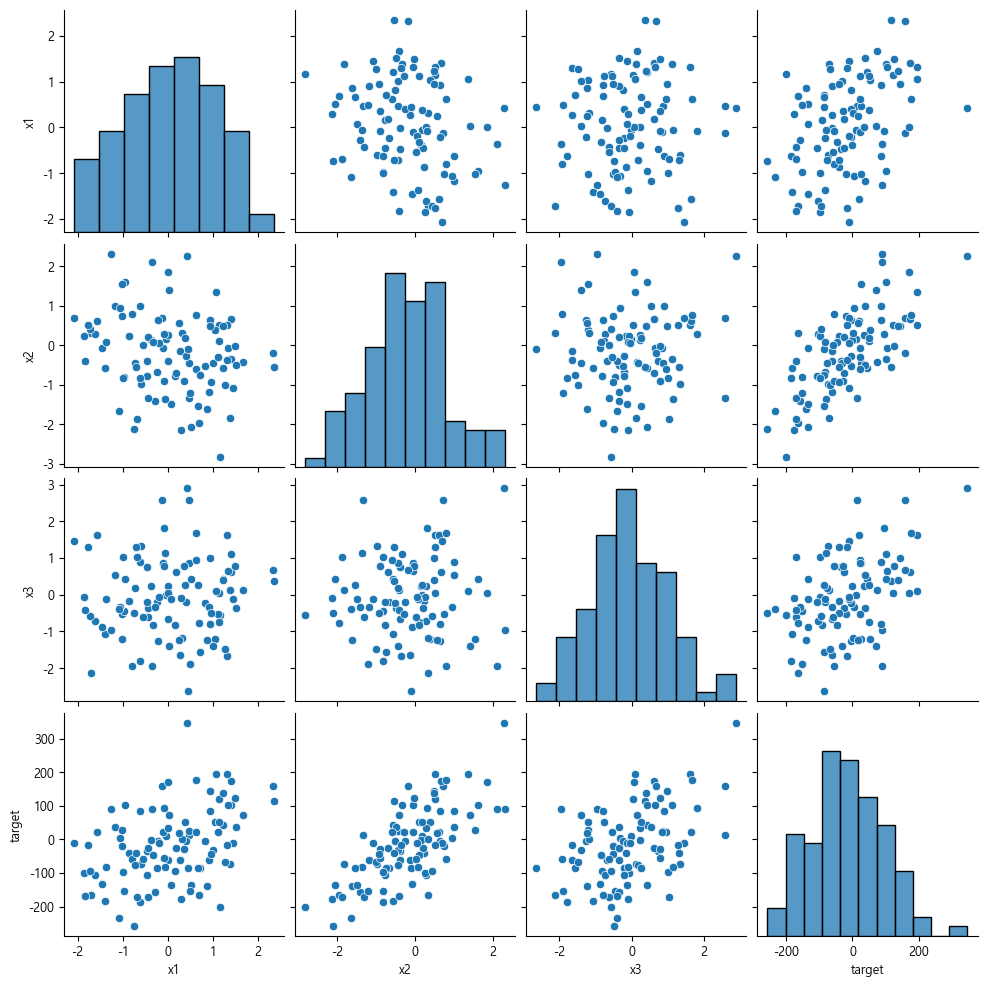

In [76]:
sb.pairplot(data=origin )
plt.show()
plt.close()

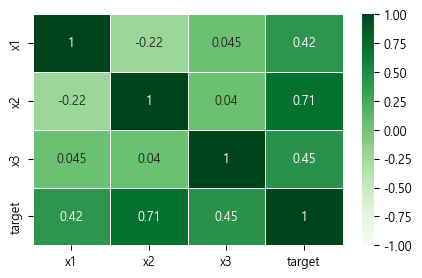

In [77]:
plt.figure(figsize=(5,3))

sb.heatmap(origin.corr(method= 'pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()


### [2] 데이터를 학습(train)용과 테스트(test)용으로 나누고, 선형회귀 모델을 학습시키고,학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행한 후, 모델의 성능을 평가하라.

[훈련결과 시각화]


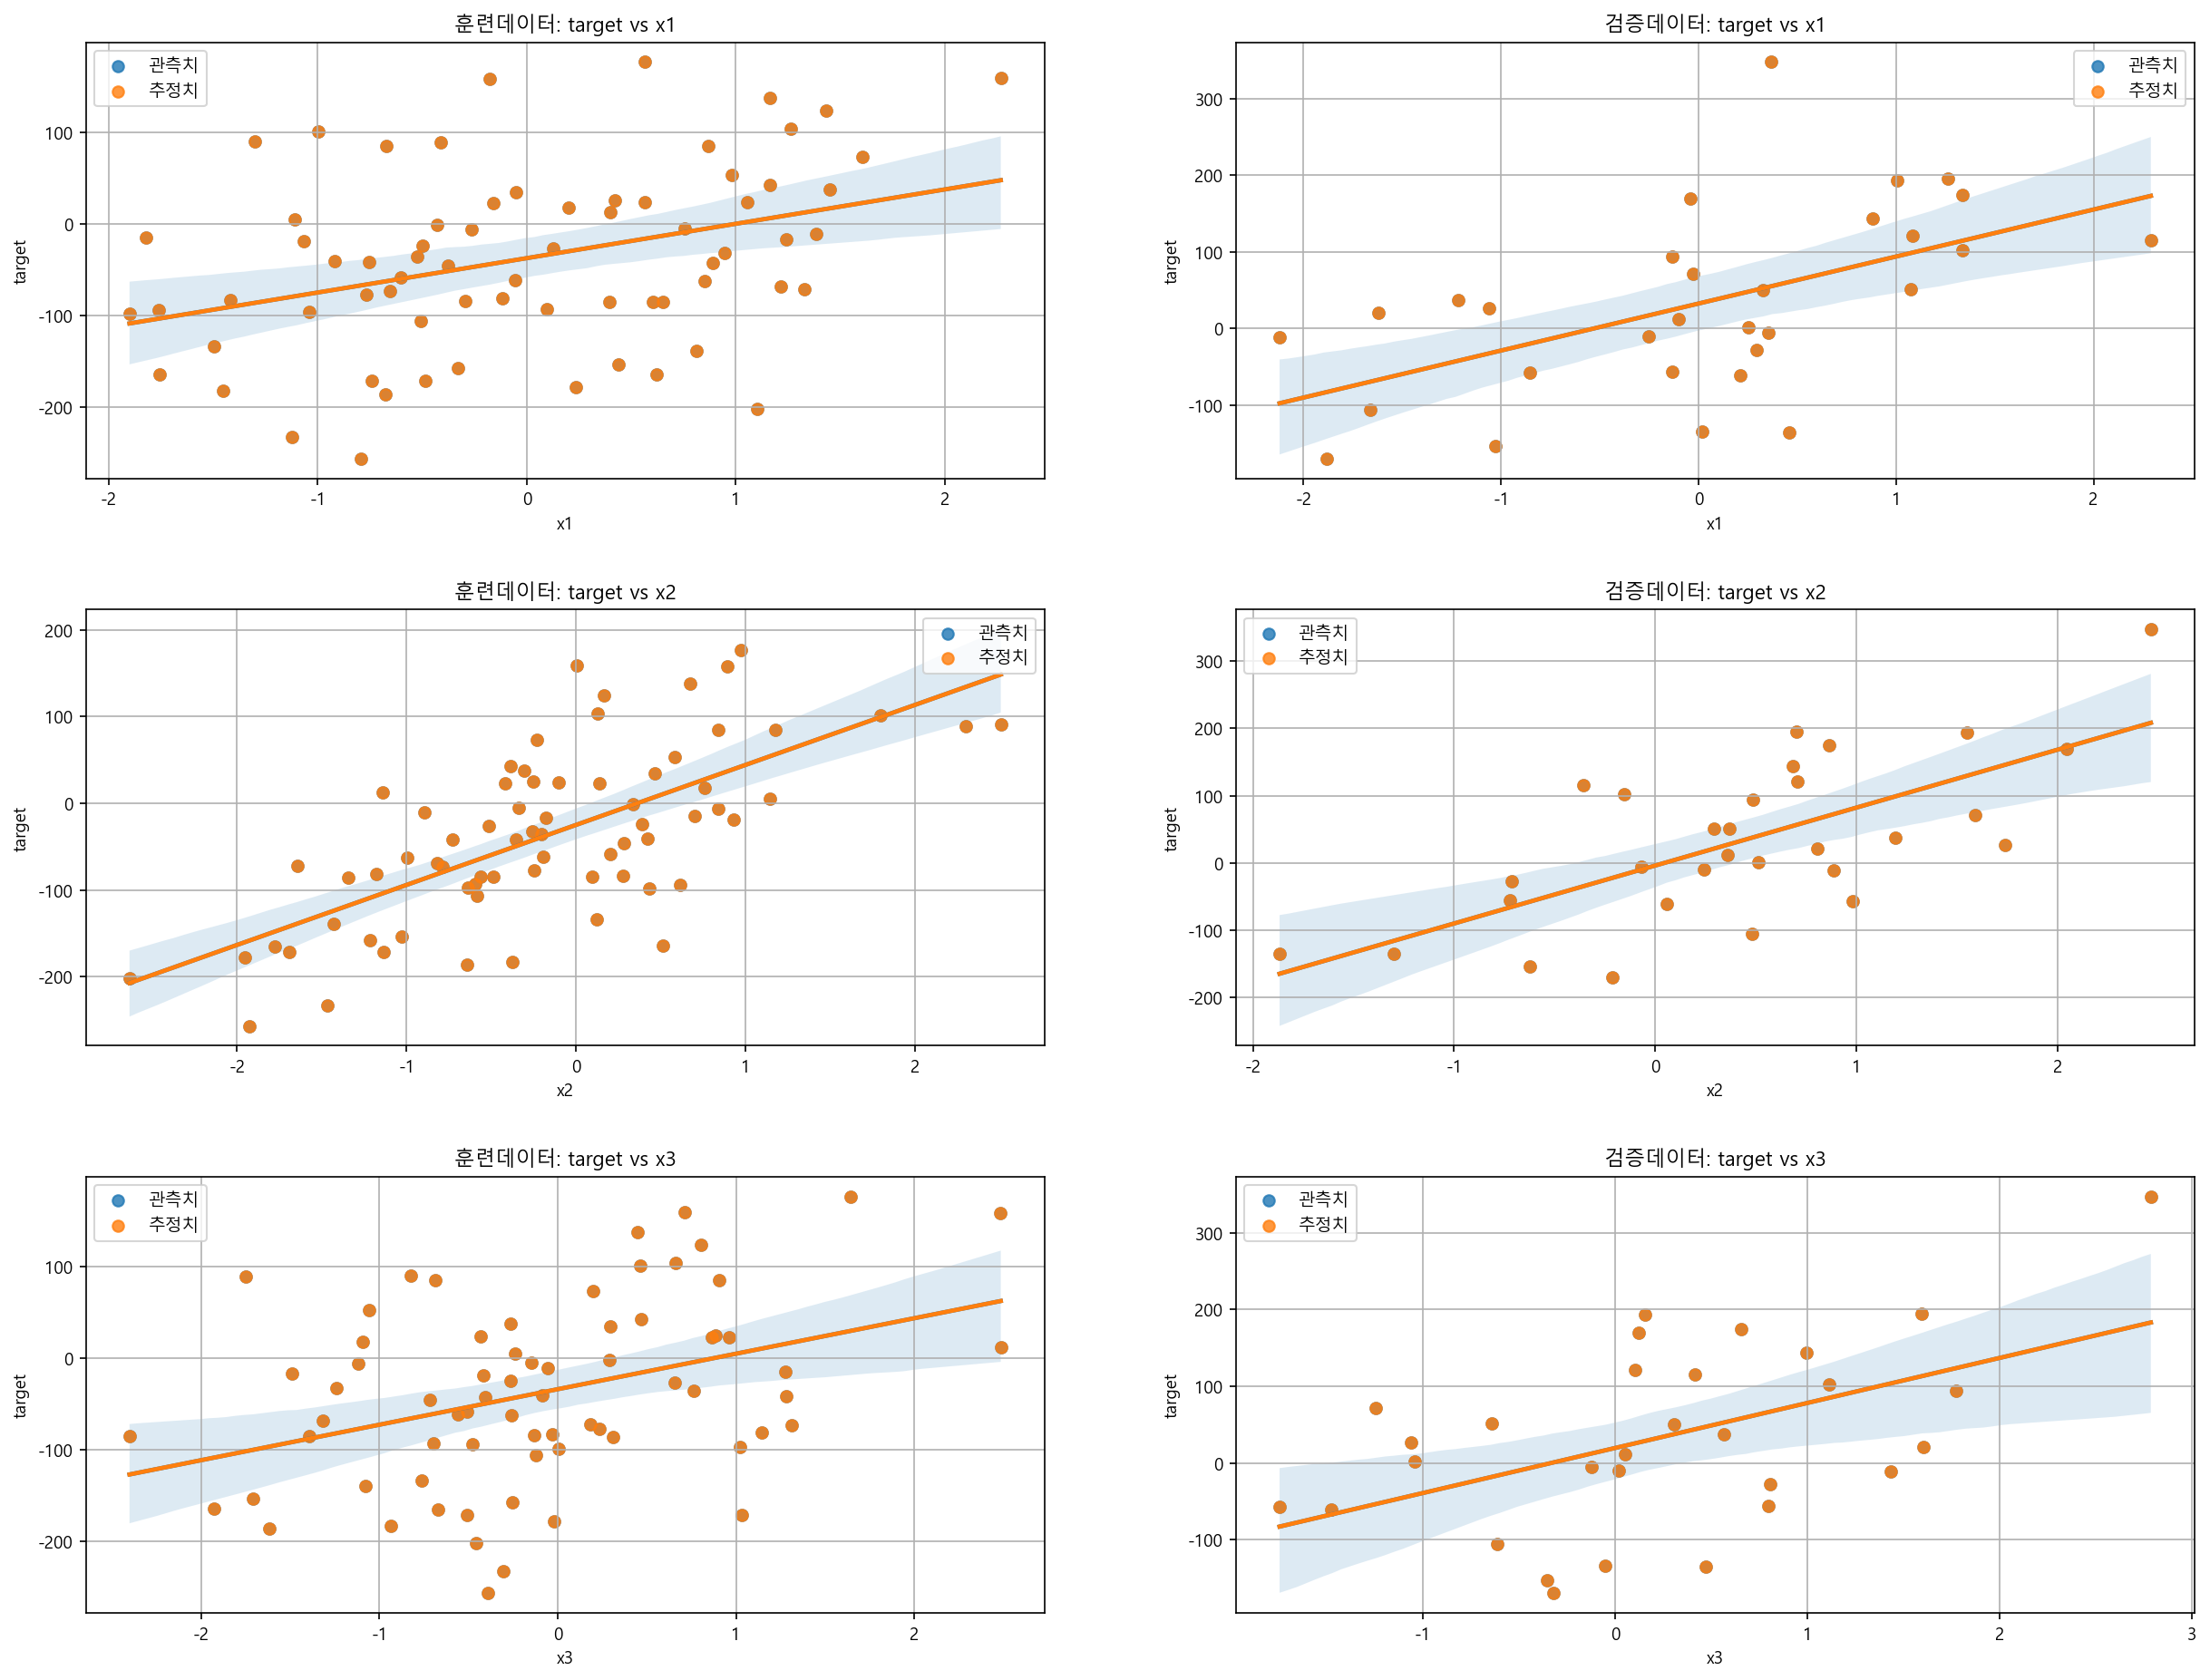

[성능지표]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |            1 |
| 평균절대오차(MAE)             |  1.95494e-14 |  2.92137e-14 |
| 평균제곱오차(MSE)             |  7.17909e-28 |  1.59259e-27 |
| 평균오차(RMSE)                |  2.67938e-14 |  3.99073e-14 |
| 평균 절대 백분오차 비율(MAPE) |  5.59192e-14 |  4.99372e-14 |
| 평균 비율 오차(MPE)           | -1.79017e-14 |   -9.381e-15 |
+-------------------------------+--------------+--------------+

[회귀식]
target = 63.894 * x1 + 89.997 * x2 + 42.649 * x3 + -16.379



In [78]:
yname = 'target'
x = origin.drop(yname,axis=1)
y = origin[yname]
xnames = list(x.columns)
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# 독립변수는 데이터 프레임으로 재구성한다.
x_std_df = DataFrame(x_std, index = x.index, columns = x.columns)
# --------------------------------
# 데이터 분할
# --------------------------------


x_train, x_test, y_train, y_test = train_test_split(x_std_df, y, test_size=0.3, random_state=123)

# --------------------------------
# 회귀분석
# --------------------------------
# 분석모델 생성
model = LinearRegression(n_jobs=-1) # n_jobs : 사용하는 cpu 코어의 개수 // -1은 최대치
fit = model.fit(x_train, y_train)

# --------------------------------
# 훈련, 검증 데이터에 대한 예측치
# --------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

# --------------------------------
# 시각화 및 성능지표 계산
# --------------------------------
# 반복 수행을 위해 훈련/검증 데이터를 하나로 묶음
target = [[x_train, y_train, y_train_pred], [x_test, y_test, y_test_pred]]

# 성능지표 저장용 리스트
result_data = []

# 시각화 시작
print("[훈련결과 시각화]")
size = len(xnames)

fig, ax = plt.subplots(size, 2, figsize=(20, 5*size), dpi=150)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    result = {
        "결정계수(R2)": r2_score(v[1], v[2]),
        "평균절대오차(MAE)": mean_absolute_error(v[1], v[2]),
        "평균제곱오차(MSE)": mean_squared_error(v[1], v[2]),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "평균 비율 오차(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }
    
    result_data.append(result)
    
    # 서브플롯에서 바깥의 반복문이 열을 담당하도록 구성하였으므로, 내부 반복문은 행(변수 종류별)을 담당
    for j, w in enumerate(xnames):
        sb.regplot(x=v[0][w], y=v[1], ci=95, ax=ax[j][i], label='관측치')
        sb.regplot(x=v[0][w], y=v[2], ci=0, ax=ax[j][i], label='추정치')
        ax[j][i].set_title(f"훈련데이터: {yname} vs {w}" if i == 0 else f"검증데이터: {yname} vs {w}")
        ax[j][i].legend()
        ax[j][i].grid(True)

plt.show()
plt.close()

result_df = DataFrame(result_data, index=["훈련데이터", "검증데이터"])
print("[성능지표]")
print(tabulate(result_df.T, headers='keys', tablefmt='psql',showindex=True, numalign="right"), end="\n\n")

# --------------------------------
# 회귀식 도출
# --------------------------------
expr = "{yname} = ".format(yname=yname)

for i, v in enumerate(xnames):
    expr += f"{fit.coef_[i]:0.3f} * {v} + " 

expr += f"{fit.intercept_:0.3f}" 
print("[회귀식]")
print(expr, end="\n\n")


### [3] 위의 작업을 완료한 후 결과를 보고하라.

In [79]:
for i, v in enumerate(target):
    print(f"[{'훈련' if i == 0 else '검증'}데이터에 대한 결과보고]")
    
    target_x, target_y, target_y_pred = v
    
    # 잔차
    resid = target_y - target_y_pred

    # 절편과 계수를 하나의 배열로 결합
    params = np.append(fit.intercept_, fit.coef_)

    # 검증용 독립변수에 상수항 추가
    design_x = target_x.copy()
    design_x.insert(0, '상수', 1)

    dot = np.dot(design_x.T,design_x)   # 행렬곱
    inv = np.linalg.inv(dot)            # 역행렬
    dia = inv.diagonal()                # 대각원소

    # 제곱오차
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # 표준오차
    ts_b = params / se_b                # t값

    # 각 독립수에 대한 pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for v in target_x.columns]

    # 표준화 계수
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression()
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # 결과표 구성하기
    result_df = DataFrame({
        "종속변수": [yname] * size,
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 3),
        "β(표준화 계수)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "유의확률": np.round(p_values[1:], 3),
        "VIF": vif,
    })

    #result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    resid = target_y - target_y_pred        # 잔차
    dw = durbin_watson(resid)               # 더빈 왓슨 통계량
    r2 = r2_score(target_y, target_y_pred)  # 결정계수(설명력)
    rowcount = len(target_x)                # 표본수
    featurecount = len(target_x.columns)    # 독립변수의 수

    # 보정된 결정계수
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # f값
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = f"𝑅^2({r2:.3f}), Adj.𝑅^2({adj_r2:.3f}), F({f_statistic:.3f}), P-value({p:.4g}), Durbin-Watson({dw:.3f})"
    print(tpl, end="\n\n")

    # 결과보고
    tpl = f"{yname}에 대하여 {','.join(xnames)}로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의{'하다' if p <= 0.05 else '하지 않다'}(F({len(x.columns)},{len(x.index)-len(x.columns)-1}) = {f_statistic:0.3f}, p {'<=' if p <= 0.05 else '>'} 0.05)."

    print(tpl, end = '\n\n')

    # 독립변수 보고
    for n in xnames:
        item = result_df[result_df['독립변수'] == n]
        coef = item['B(비표준화 계수)'].values[0]
        pvalue = item['유의확률'].values[0]

        s = f"{n}의 회귀계수는 {coef:0.3f}(p {'<=' if pvalue <= 0.05 else '>'} 0.05)로, {yname}에 대하여 {'유의미한' if pvalue <= 0.05 else '유의하지 않은'} 예측변인인 것으로 나타났다."

        print(s)
        
    print("")

[훈련데이터에 대한 결과보고]
+----+------------+------------+--------------------+------------+------------------+-------------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |           t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+-------------+------------+---------|
|  0 | target     | x1         |            63.894  |          0 |            0.634 | 1.80835e+16 |          0 | 1.09021 |
|  1 | target     | x2         |            89.9966 |          0 |            0.884 | 2.51996e+16 |          0 | 1.09067 |
|  2 | target     | x3         |            42.649  |          0 |            0.422 | 1.25836e+16 |          0 | 1.0005  |
+----+------------+------------+--------------------+------------+------------------+-------------+------------+---------+

𝑅^2(1.000), Adj.𝑅^2(1.000), F(inf), P-value(0), Durbin-Watson(1.814)

target에 대하여 x1,x2,x3로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,96) = inf, p <

## 문제 2

다음의 데이터는 442명의 당뇨병 환자를 대상으로 검사 결과이다.

> https://data.hossam.kr/mldata/diabetes.xlsx

| 변수 | 설명 |
|---|---|
| age | 나이 |
| sex | 성별 |
| bmi | bmi지수(비만도) |
| bp | 평균 혈압 |
| s1~s6 | 6종류의 혈액검사 수치 |
| target | 당뇨병 진행률(종속변수) |

주어진 데이터는 표준화가 적용되어 있다.

이를 활용하여 당뇨병 진행률을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

분석 절차는 1번 문제와 동일하다.

In [80]:
origin = read_excel('https://data.hossam.kr/mldata/diabetes.xlsx')
origin.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [81]:
df_fix = origin.drop(['s1','s4','age','s6','s2'],axis=1)
df_fix

,sex,bmi,bp,s3,s5,target
0,0.050680,0.061696,0.021872,-0.043401,0.019907,151
1,-0.044642,-0.051474,-0.026328,0.074412,-0.068332,75
2,0.050680,0.044451,-0.005670,-0.032356,0.002861,141
3,-0.044642,-0.011595,-0.036656,-0.036038,0.022688,206
4,-0.044642,-0.036385,0.021872,0.008142,-0.031988,135
...,...,...,...,...,...,...
437,0.050680,0.019662,0.059744,-0.028674,0.031193,178
438,0.050680,-0.015906,-0.067642,-0.028674,-0.018114,104
439,0.050680,-0.015906,0.017293,-0.024993,-0.046883,132
440,-0.044642,0.039062,0.001215,-0.028674,0.044529,220


### [1] 주어진 데이터셋을 산점도로 시각화하고, 특성과 타겟 간의 관계를 시각적으로 분석하라.

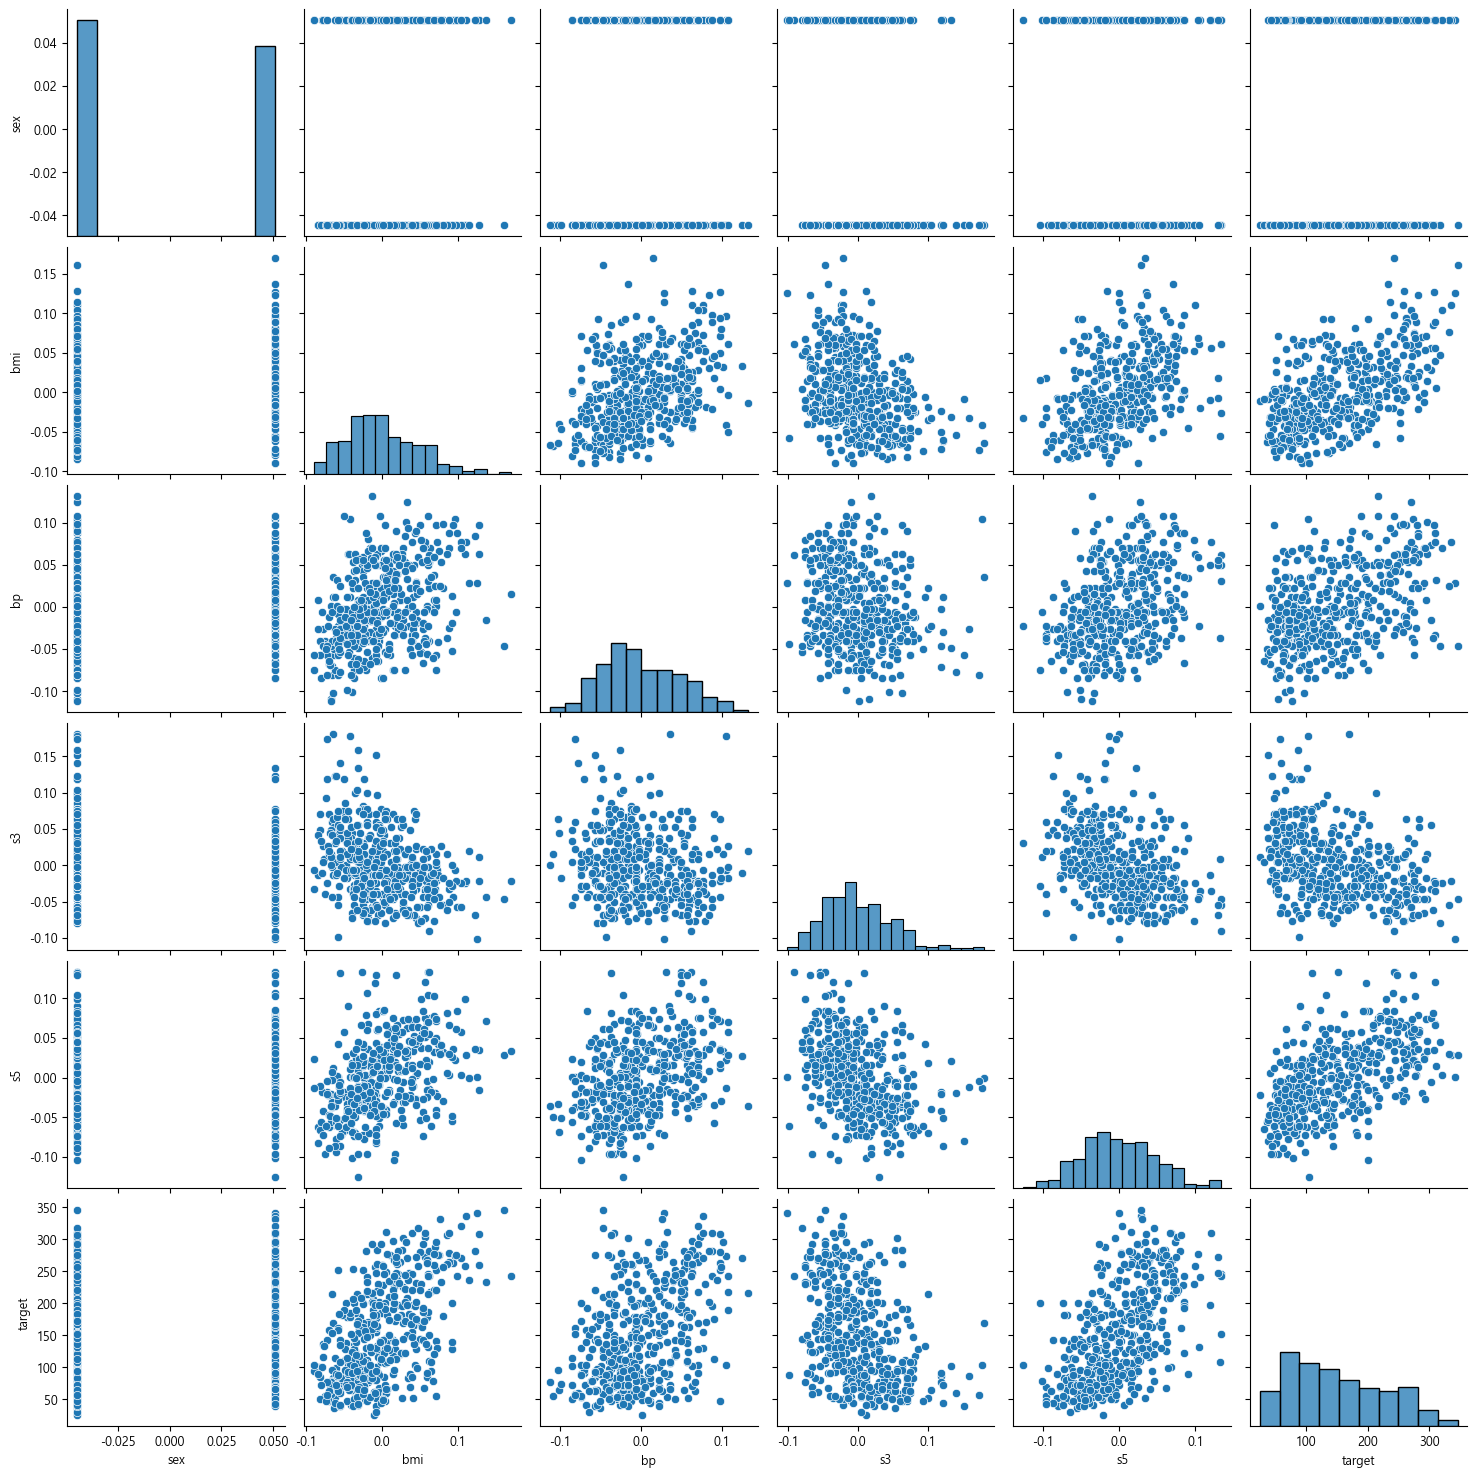

In [82]:
sb.pairplot(data=df_fix)
plt.grid()
plt.show()
plt.close()

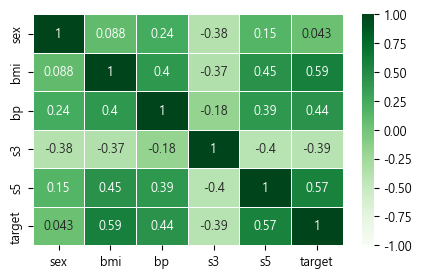

In [83]:
plt.figure(figsize=(5,3))

sb.heatmap(df_fix.corr(method= 'pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()


### [2] 데이터를 학습(train)용과 테스트(test)용으로 나누고, 선형회귀 모델을 학습시키고,학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행한 후, 모델의 성능을 평가하라.

[훈련결과 시각화]


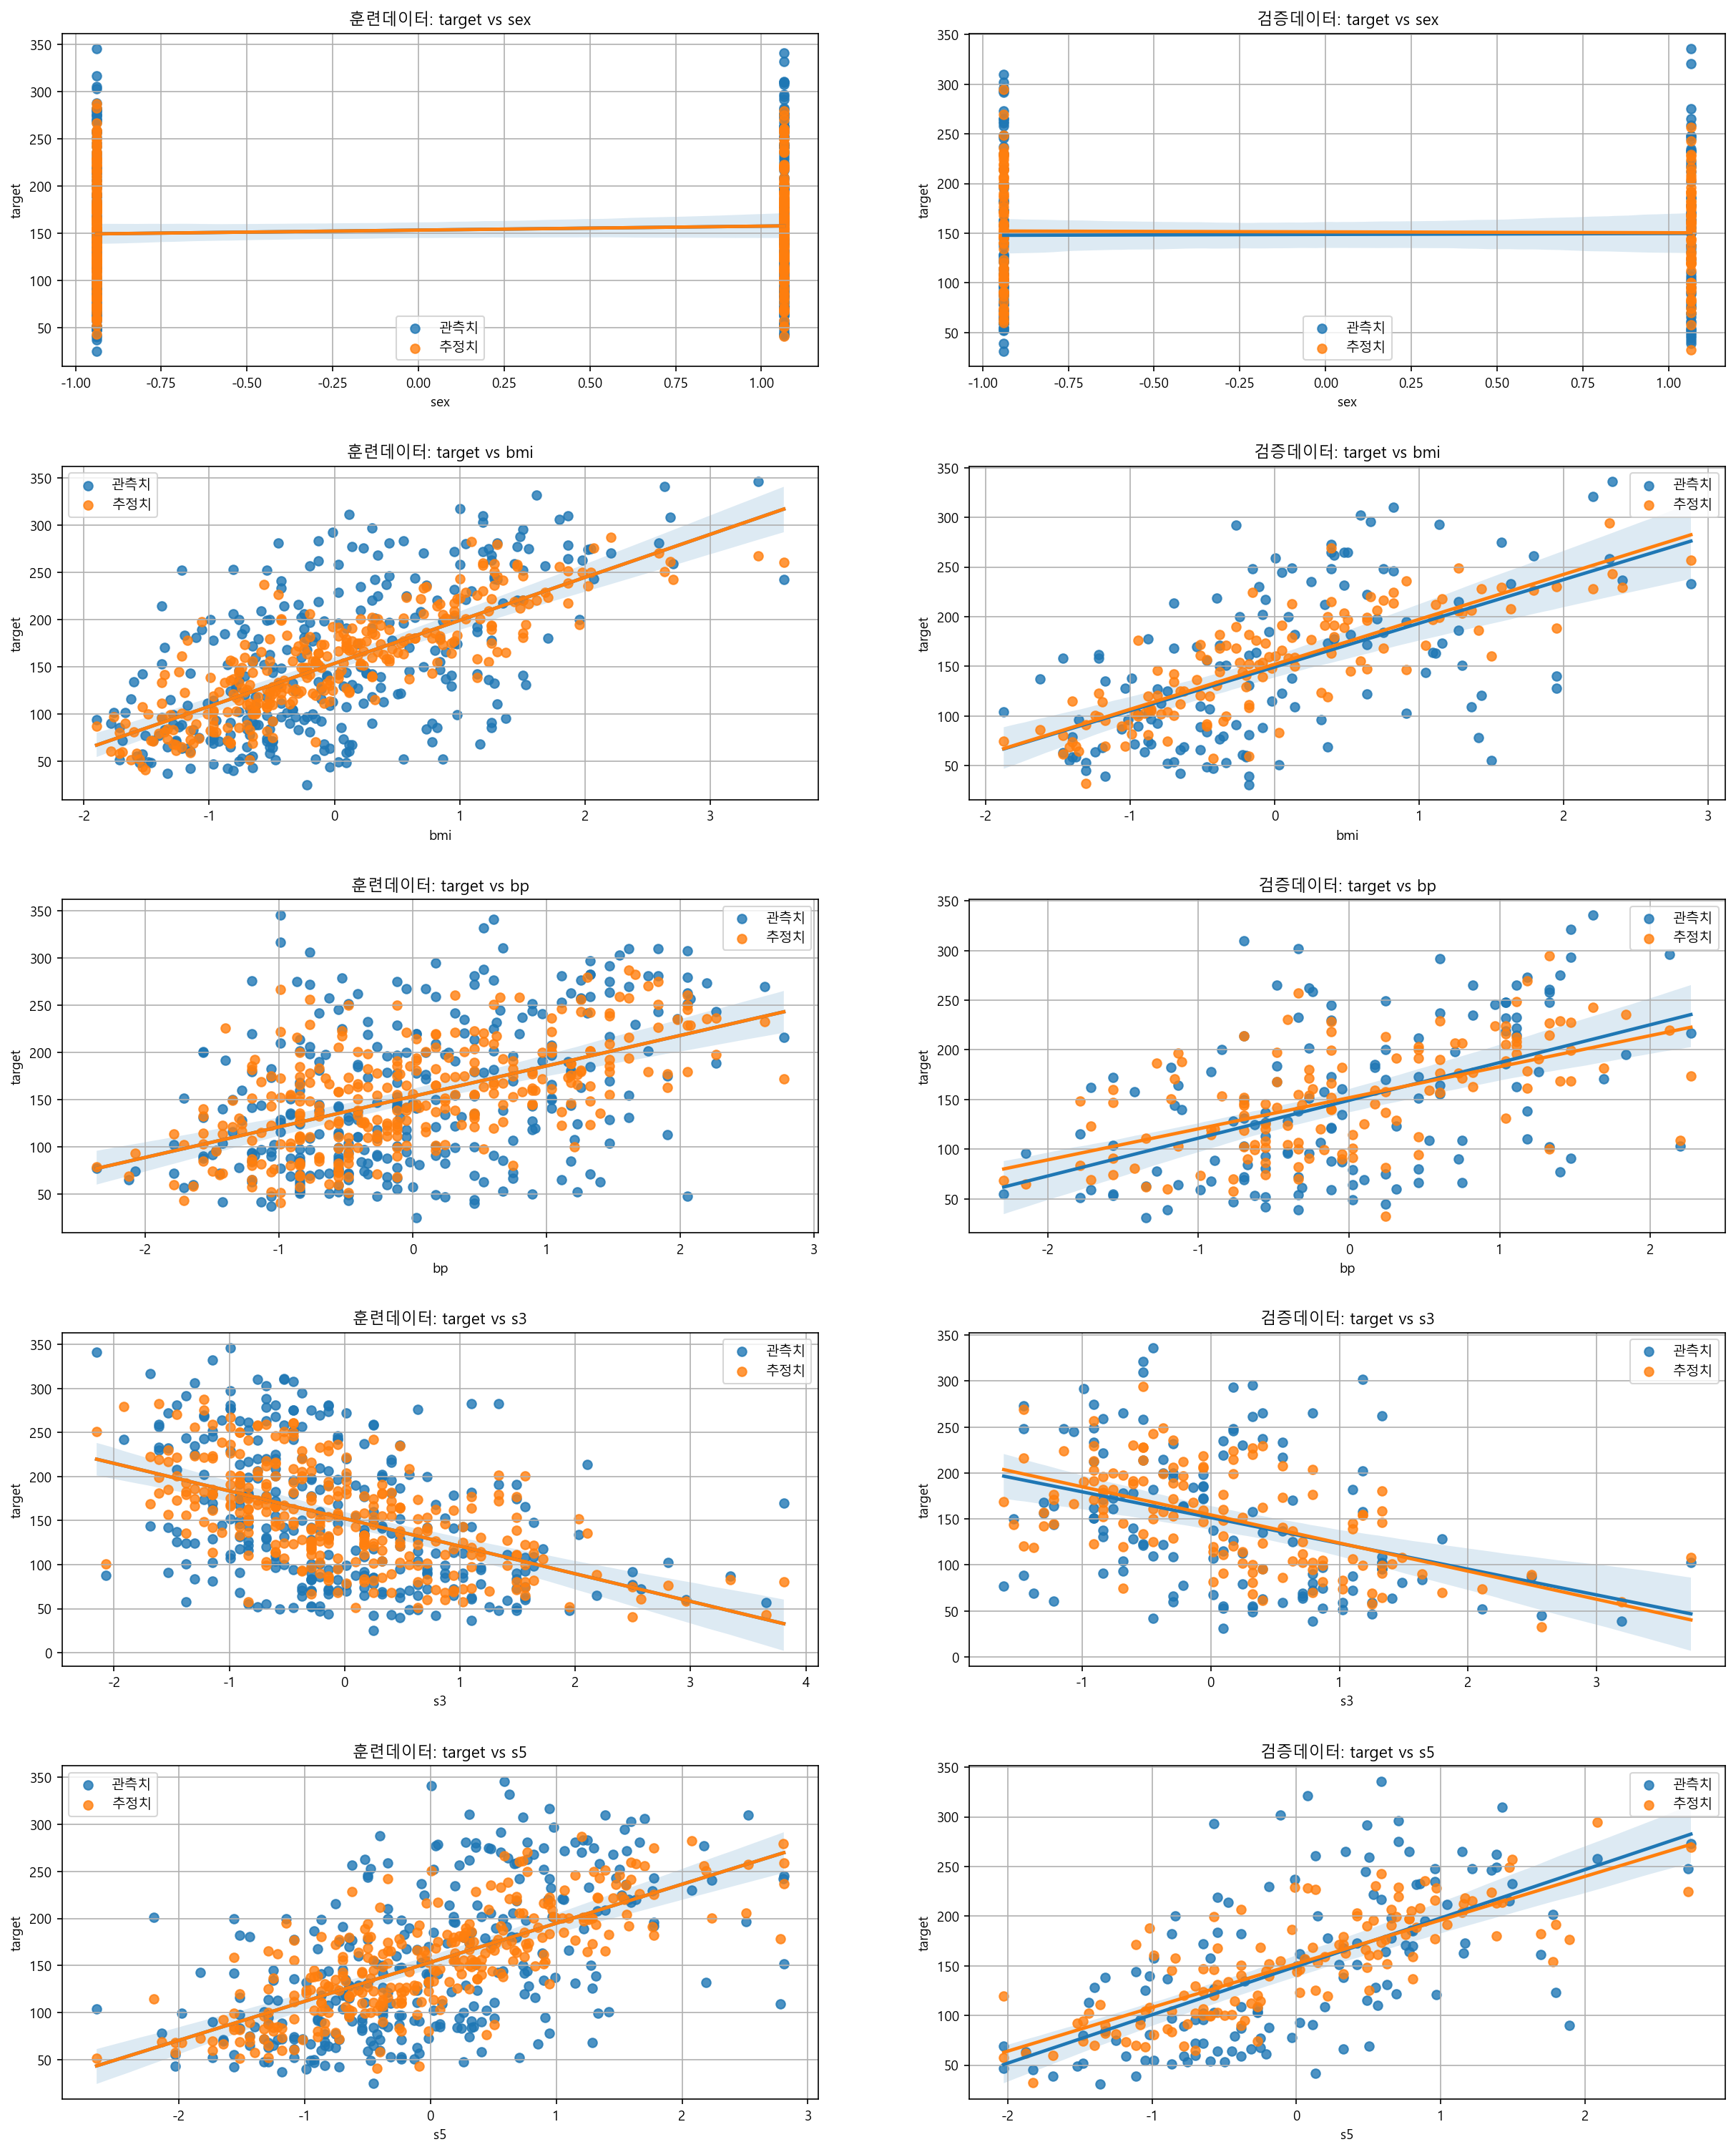

[성능지표]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.504142 |     0.512815 |
| 평균절대오차(MAE)             |      43.6235 |       44.559 |
| 평균제곱오차(MSE)             |      2933.17 |      2897.15 |
| 평균오차(RMSE)                |      54.1588 |      53.8252 |
| 평균 절대 백분오차 비율(MAPE) |      39.0679 |      40.1353 |
| 평균 비율 오차(MPE)           |     -17.8649 |      -20.234 |
+-------------------------------+--------------+--------------+

[회귀식]
target = -11.693 * sex + 26.355 * bmi + 13.511 * bp + -15.083 * s3 + 20.878 * s5 + 152.947



In [84]:
yname = 'target'
x = df_fix.drop(yname,axis=1)
y = df_fix[yname]
xnames = list(x.columns)
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# 독립변수는 데이터 프레임으로 재구성한다.
x_std_df = DataFrame(x_std, index = x.index, columns = x.columns)
# --------------------------------
# 데이터 분할
# --------------------------------


x_train, x_test, y_train, y_test = train_test_split(x_std_df, y, test_size=0.3, random_state=123)

# --------------------------------
# 회귀분석
# --------------------------------
# 분석모델 생성
model = LinearRegression(n_jobs=-1) # n_jobs : 사용하는 cpu 코어의 개수 // -1은 최대치
fit = model.fit(x_train, y_train)

# --------------------------------
# 훈련, 검증 데이터에 대한 예측치
# --------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

# --------------------------------
# 시각화 및 성능지표 계산
# --------------------------------
# 반복 수행을 위해 훈련/검증 데이터를 하나로 묶음
target = [[x_train, y_train, y_train_pred], [x_test, y_test, y_test_pred]]

# 성능지표 저장용 리스트
result_data = []

# 시각화 시작
print("[훈련결과 시각화]")
size = len(xnames)

fig, ax = plt.subplots(size, 2, figsize=(20, 5*size), dpi=150)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    result = {
        "결정계수(R2)": r2_score(v[1], v[2]),
        "평균절대오차(MAE)": mean_absolute_error(v[1], v[2]),
        "평균제곱오차(MSE)": mean_squared_error(v[1], v[2]),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "평균 비율 오차(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }
    
    result_data.append(result)
    
    # 서브플롯에서 바깥의 반복문이 열을 담당하도록 구성하였으므로, 내부 반복문은 행(변수 종류별)을 담당
    for j, w in enumerate(xnames):
        sb.regplot(x=v[0][w], y=v[1], ci=95, ax=ax[j][i], label='관측치')
        sb.regplot(x=v[0][w], y=v[2], ci=0, ax=ax[j][i], label='추정치')
        ax[j][i].set_title(f"훈련데이터: {yname} vs {w}" if i == 0 else f"검증데이터: {yname} vs {w}")
        ax[j][i].legend()
        ax[j][i].grid(True)

plt.show()
plt.close()

result_df = DataFrame(result_data, index=["훈련데이터", "검증데이터"])
print("[성능지표]")
print(tabulate(result_df.T, headers='keys', tablefmt='psql',showindex=True, numalign="right"), end="\n\n")

# --------------------------------
# 회귀식 도출
# --------------------------------
expr = "{yname} = ".format(yname=yname)

for i, v in enumerate(xnames):
    expr += f"{fit.coef_[i]:0.3f} * {v} + " 

expr += f"{fit.intercept_:0.3f}" 
print("[회귀식]")
print(expr, end="\n\n")


### [3] 위의 작업을 완료한 후 결과를 보고하라.

In [85]:
for i, v in enumerate(target):
    print(f"[{'훈련' if i == 0 else '검증'}데이터에 대한 결과보고]")
    
    target_x, target_y, target_y_pred = v
    
    # 잔차
    resid = target_y - target_y_pred

    # 절편과 계수를 하나의 배열로 결합
    params = np.append(fit.intercept_, fit.coef_)

    # 검증용 독립변수에 상수항 추가
    design_x = target_x.copy()
    design_x.insert(0, '상수', 1)

    dot = np.dot(design_x.T,design_x)   # 행렬곱
    inv = np.linalg.inv(dot)            # 역행렬
    dia = inv.diagonal()                # 대각원소

    # 제곱오차
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # 표준오차
    ts_b = params / se_b                # t값

    # 각 독립수에 대한 pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for v in target_x.columns]

    # 표준화 계수
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression()
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # 결과표 구성하기
    result_df = DataFrame({
        "종속변수": [yname] * size,
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 3),
        "β(표준화 계수)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "유의확률": np.round(p_values[1:], 3),
        "VIF": vif,
    })

    #result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    resid = target_y - target_y_pred        # 잔차
    dw = durbin_watson(resid)               # 더빈 왓슨 통계량
    r2 = r2_score(target_y, target_y_pred)  # 결정계수(설명력)
    rowcount = len(target_x)                # 표본수
    featurecount = len(target_x.columns)    # 독립변수의 수

    # 보정된 결정계수
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # f값
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = f"𝑅^2({r2:.3f}), Adj.𝑅^2({adj_r2:.3f}), F({f_statistic:.3f}), P-value({p:.4g}), Durbin-Watson({dw:.3f})"
    print(tpl, end="\n\n")

    # 결과보고
    tpl = f"{yname}에 대하여 {','.join(xnames)}로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의{'하다' if p <= 0.05 else '하지 않다'}(F({len(x.columns)},{len(x.index)-len(x.columns)-1}) = {f_statistic:0.3f}, p {'<=' if p <= 0.05 else '>'} 0.05)."

    print(tpl, end = '\n\n')

    # 독립변수 보고
    for n in xnames:
        item = result_df[result_df['독립변수'] == n]
        coef = item['B(비표준화 계수)'].values[0]
        pvalue = item['유의확률'].values[0]

        s = f"{n}의 회귀계수는 {coef:0.3f}(p {'<=' if pvalue <= 0.05 else '>'} 0.05)로, {yname}에 대하여 {'유의미한' if pvalue <= 0.05 else '유의하지 않은'} 예측변인인 것으로 나타났다."

        print(s)
        
    print("")

[훈련데이터에 대한 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | target     | sex        |           -11.6927 |      3.465 |           -0.152 | -3.375 |      0.001 | 1.24414 |
|  1 | target     | bmi        |            26.3552 |      3.747 |            0.346 |  7.033 |      0     | 1.47694 |
|  2 | target     | bp         |            13.5107 |      3.517 |            0.177 |  3.841 |      0     | 1.29978 |
|  3 | target     | s3         |           -15.0826 |      3.757 |           -0.197 | -4.015 |      0     | 1.47911 |
|  4 | target     | s5         |            20.8781 |      3.648 |            0.274 |  5.723 |      0     | 1.40296 |
+----+------------+------------+--------------------+------------+

## 문제 3

다음의 데이터 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.

다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다.

분석하라.

분석 절차는 1번 문제와 동일하다.

> https://data.hossam.kr/mldata/manhattan.xlsx

In [34]:
origin = read_excel('https://data.hossam.kr/mldata/manhattan.xlsx').drop('borough',axis=1)
origin.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho


In [35]:
from pandas import get_dummies
dummy_df = get_dummies(origin, columns=['neighborhood'], dtype='int', drop_first=True) 
dummy_df.head()

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,...,neighborhood_Nolita,neighborhood_Roosevelt Island,neighborhood_Soho,neighborhood_Stuyvesant Town/PCV,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Harlem,neighborhood_West Village
0,2550,0.0,1,480,9,2.0,17,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,11500,2.0,2,2000,4,1.0,96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4500,1.0,1,916,2,51.0,29,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4795,1.0,1,975,3,8.0,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17500,2.0,2,4800,3,4.0,136,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
df_fix = dummy_df.drop(['neighborhood_Upper West Side','neighborhood_Little Italy','neighborhood_Stuyvesant Town/PCV','neighborhood_Manhattanville','has_elevator','has_doorman','has_roofdeck','neighborhood_Chinatown','neighborhood_Nolita','has_gym'],axis=1)

### [1] 주어진 데이터셋을 산점도로 시각화하고, 특성과 타겟 간의 관계를 시각적으로 분석하라.

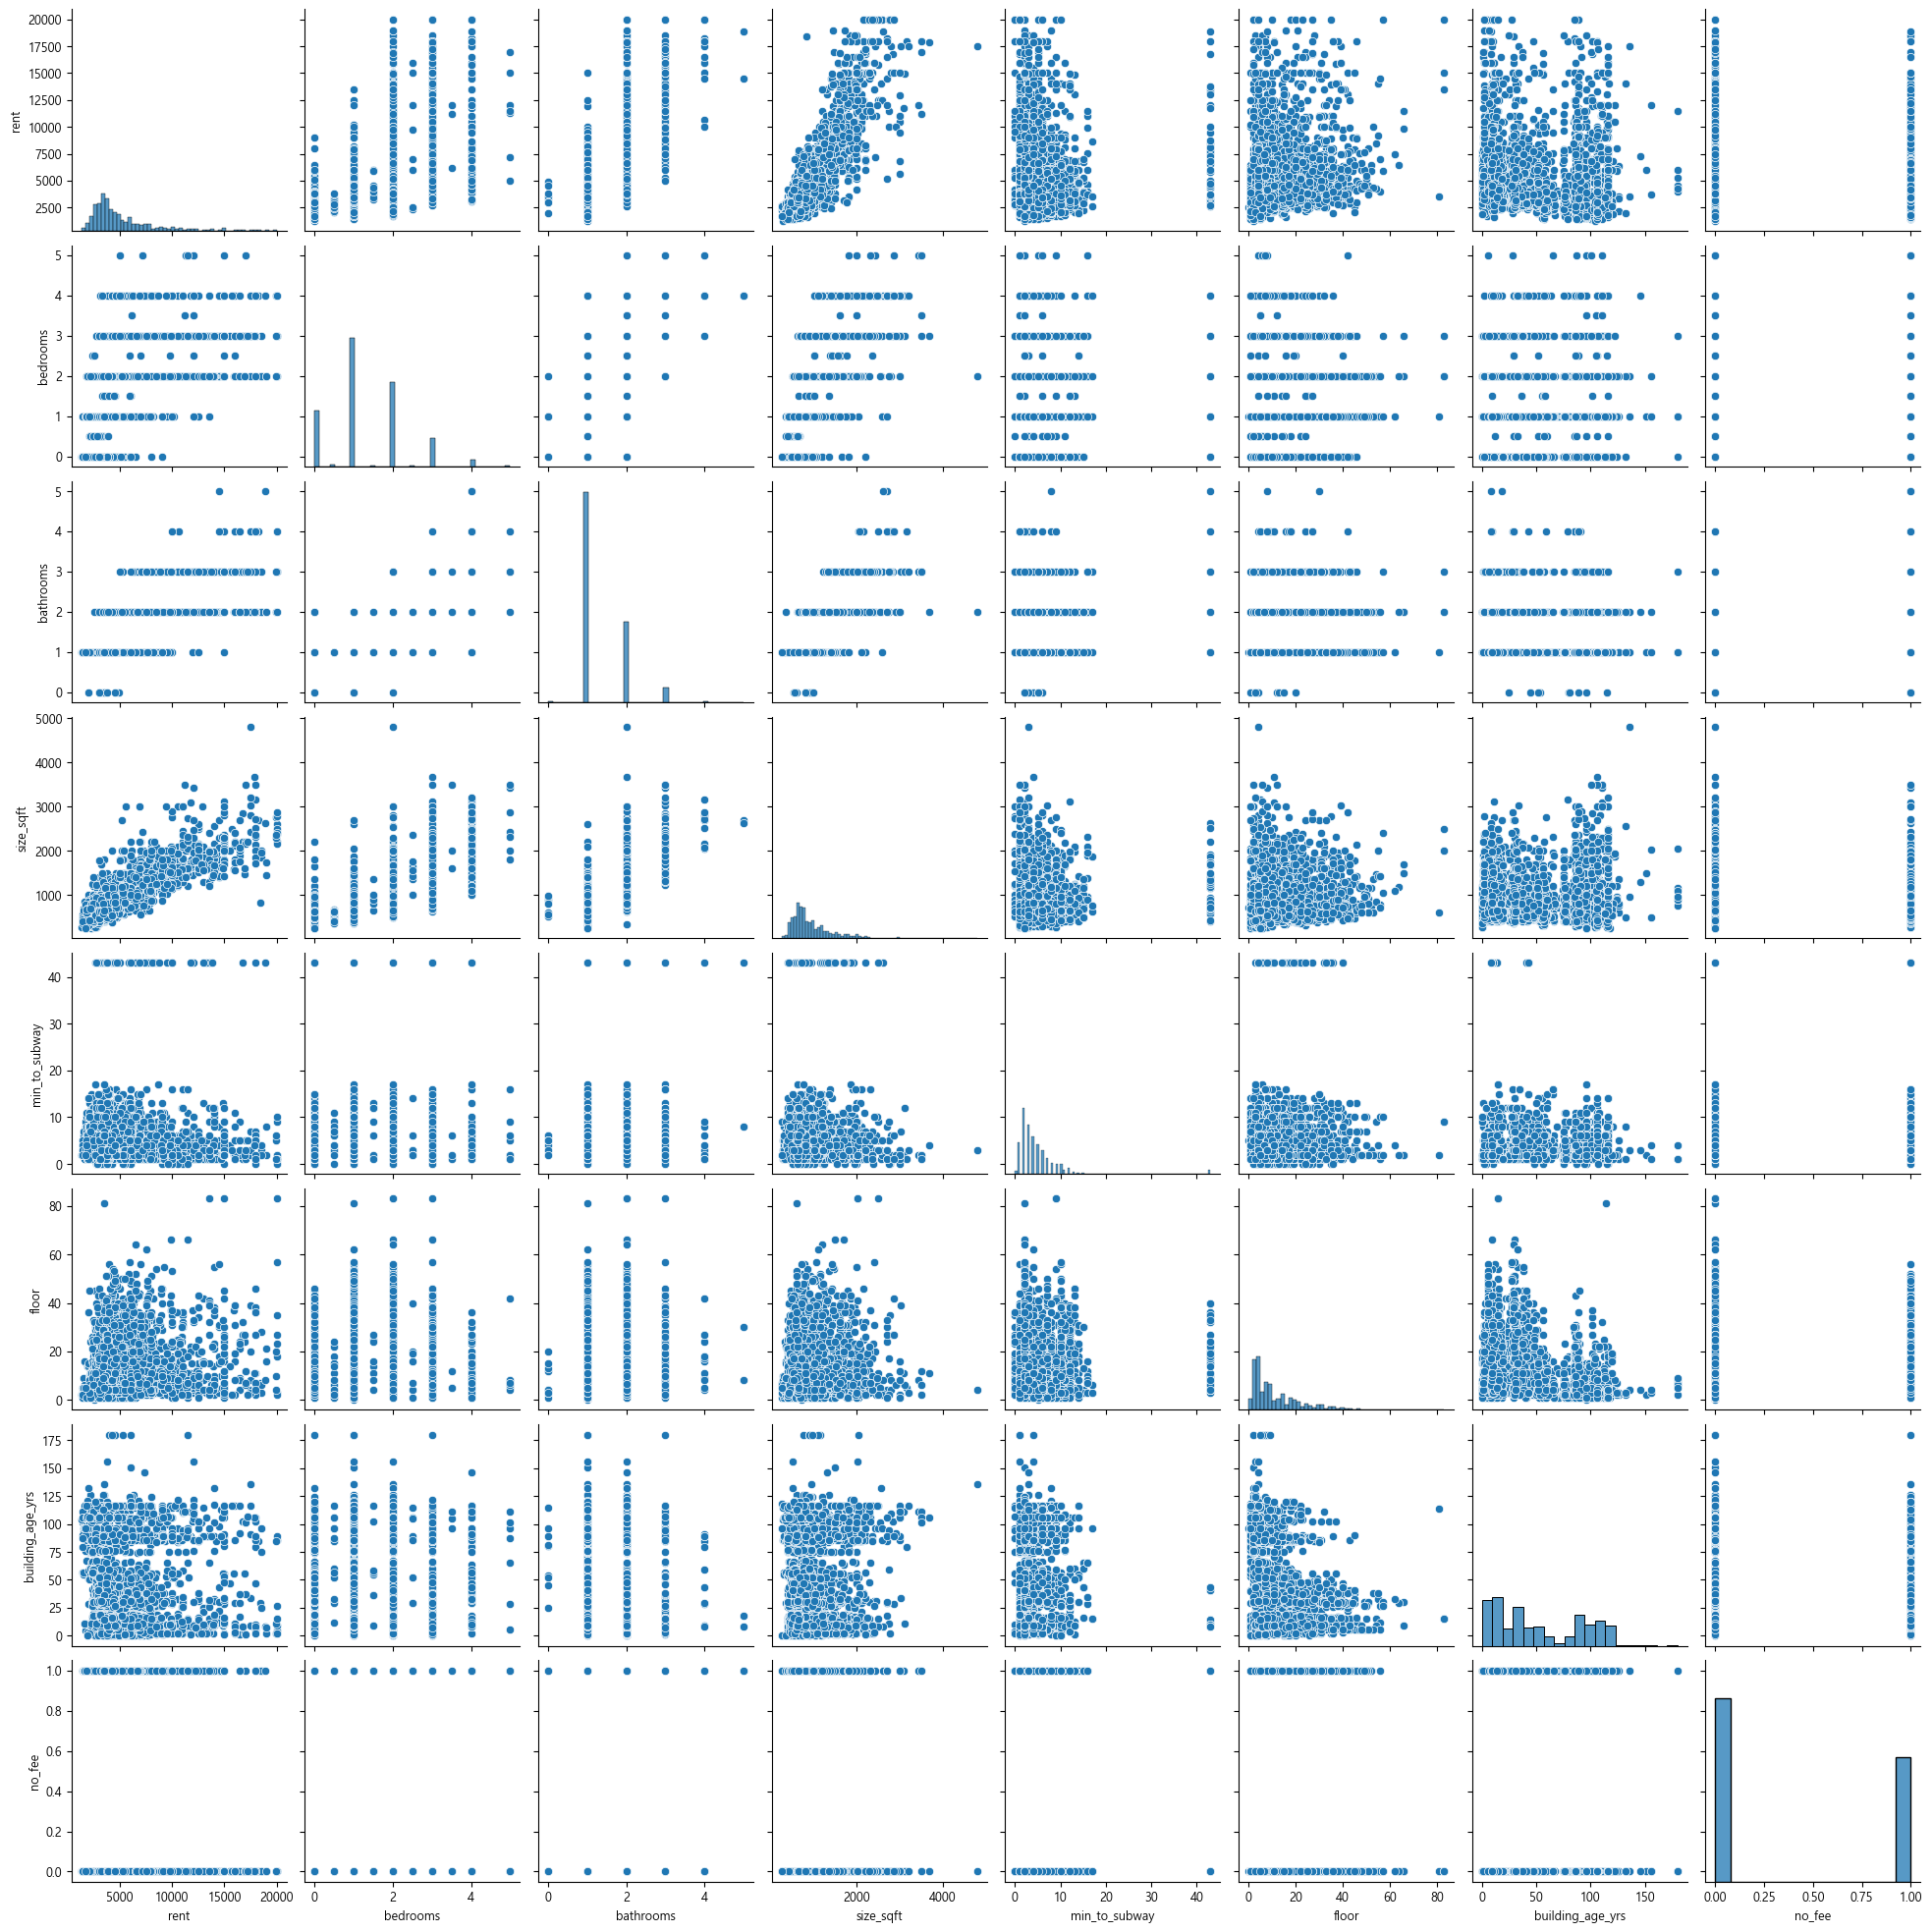

In [89]:
sb.pairplot(data=df_fix)
plt.grid()
plt.show()
plt.close()

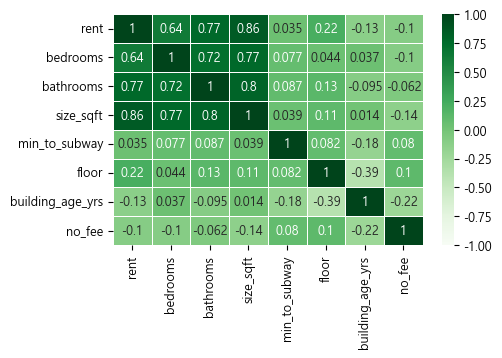

In [90]:
plt.figure(figsize=(5,3))

sb.heatmap(df_fix.corr(method= 'pearson'),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
           linewidths=.5 #구분선
)

plt.show()
plt.close()


### [2] 데이터를 학습(train)용과 테스트(test)용으로 나누고, 선형회귀 모델을 학습시키고,학습된 모델을 사용하여 테스트 데이터셋에 대한 예측을 수행한 후, 모델의 성능을 평가하라.

In [65]:
yname = 'rent'
x = df_fix.drop(yname,axis=1)
y = df_fix[yname]
xnames = list(x.columns)
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

# 독립변수는 데이터 프레임으로 재구성한다.
x_std_df = DataFrame(x_std, index = x.index, columns = x.columns)
# --------------------------------
# 데이터 분할
# --------------------------------


x_train, x_test, y_train, y_test = train_test_split(x_std_df, y, test_size=0.3, random_state=123)

# --------------------------------
# 회귀분석
# --------------------------------
# 분석모델 생성
model = LinearRegression(n_jobs=-1) # n_jobs : 사용하는 cpu 코어의 개수 // -1은 최대치
fit = model.fit(x_train, y_train)

# --------------------------------
# 훈련, 검증 데이터에 대한 예측치
# --------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

# --------------------------------
# 시각화 및 성능지표 계산
# --------------------------------
# 반복 수행을 위해 훈련/검증 데이터를 하나로 묶음
target = [[x_train, y_train, y_train_pred], [x_test, y_test, y_test_pred]]

# 성능지표 저장용 리스트
result_data = []

# 시각화 시작
print("[훈련결과 시각화]")
size = len(xnames)

# fig, ax = plt.subplots(size, 2, figsize=(20, 5*size), dpi=150)
# fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    result = {
        "결정계수(R2)": r2_score(v[1], v[2]),
        "평균절대오차(MAE)": mean_absolute_error(v[1], v[2]),
        "평균제곱오차(MSE)": mean_squared_error(v[1], v[2]),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "평균 비율 오차(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }
    
    result_data.append(result)
    
    # 서브플롯에서 바깥의 반복문이 열을 담당하도록 구성하였으므로, 내부 반복문은 행(변수 종류별)을 담당
#     for j, w in enumerate(xnames):
#         sb.regplot(x=v[0][w], y=v[1], ci=95, ax=ax[j][i], label='관측치')
#         sb.regplot(x=v[0][w], y=v[2], ci=0, ax=ax[j][i], label='추정치')
#         ax[j][i].set_title(f"훈련데이터: {yname} vs {w}" if i == 0 else f"검증데이터: {yname} vs {w}")
#         ax[j][i].legend()
#         ax[j][i].grid(True)

# plt.show()
# plt.close()

result_df = DataFrame(result_data, index=["훈련데이터", "검증데이터"])
print("[성능지표]")
print(tabulate(result_df.T, headers='keys', tablefmt='psql',showindex=True, numalign="right"), end="\n\n")

# --------------------------------
# 회귀식 도출
# --------------------------------
expr = "{yname} = ".format(yname=yname)

for i, v in enumerate(xnames):
    expr += f"{fit.coef_[i]:0.3f} * {v} + " 

expr += f"{fit.intercept_:0.3f}" 
print("[회귀식]")
print(expr, end="\n\n")


[훈련결과 시각화]
[성능지표]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.827296 |     0.791802 |
| 평균절대오차(MAE)             |      830.175 |      894.529 |
| 평균제곱오차(MSE)             |  1.73119e+06 |  2.07049e+06 |
| 평균오차(RMSE)                |      1315.75 |      1438.92 |
| 평균 절대 백분오차 비율(MAPE) |      16.1004 |      17.9262 |
| 평균 비율 오차(MPE)           |      -2.1938 |     -2.75035 |
+-------------------------------+--------------+--------------+

[회귀식]
rent = -128.432 * bedrooms + 603.028 * bathrooms + 2274.352 * size_sqft + -39.874 * min_to_subway + 272.801 * floor + -250.318 * building_age_yrs + -36.512 * no_fee + 60.026 * has_washer_dryer + -46.830 * has_dishwasher + -26.108 * has_patio + -25.768 * has_gym + -252.174 * neighborhood_Central Harlem + 77.843 * neighborhood_Central Park South + 179.543 * neighborhood_Chelsea + 

### [3] 위의 작업을 완료한 후 결과를 보고하라.

In [66]:
for i, v in enumerate(target):
    print(f"[{'훈련' if i == 0 else '검증'}데이터에 대한 결과보고]")
    
    target_x, target_y, target_y_pred = v
    
    # 잔차
    resid = target_y - target_y_pred

    # 절편과 계수를 하나의 배열로 결합
    params = np.append(fit.intercept_, fit.coef_)

    # 검증용 독립변수에 상수항 추가
    design_x = target_x.copy()
    design_x.insert(0, '상수', 1)

    dot = np.dot(design_x.T,design_x)   # 행렬곱
    inv = np.linalg.inv(dot)            # 역행렬
    dia = inv.diagonal()                # 대각원소

    # 제곱오차
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # 표준오차
    ts_b = params / se_b                # t값

    # 각 독립수에 대한 pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for v in target_x.columns]

    # 표준화 계수
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression()
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # 결과표 구성하기
    result_df = DataFrame({
        "종속변수": [yname] * size,
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 3),
        "β(표준화 계수)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "유의확률": np.round(p_values[1:], 3),
        "VIF": vif,
    })

    #result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")
    break
    resid = target_y - target_y_pred        # 잔차
    dw = durbin_watson(resid)               # 더빈 왓슨 통계량
    r2 = r2_score(target_y, target_y_pred)  # 결정계수(설명력)
    rowcount = len(target_x)                # 표본수
    featurecount = len(target_x.columns)    # 독립변수의 수

    # 보정된 결정계수
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # f값
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = f"𝑅^2({r2:.3f}), Adj.𝑅^2({adj_r2:.3f}), F({f_statistic:.3f}), P-value({p:.4g}), Durbin-Watson({dw:.3f})"
    print(tpl, end="\n\n")

    # 결과보고
    tpl = f"{yname}에 대하여 {','.join(xnames)}로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의{'하다' if p <= 0.05 else '하지 않다'}(F({len(x.columns)},{len(x.index)-len(x.columns)-1}) = {f_statistic:0.3f}, p {'<=' if p <= 0.05 else '>'} 0.05)."

    print(tpl, end = '\n\n')

    # 독립변수 보고
    for n in xnames:
        item = result_df[result_df['독립변수'] == n]
        coef = item['B(비표준화 계수)'].values[0]
        pvalue = item['유의확률'].values[0]

        s = f"{n}의 회귀계수는 {coef:0.3f}(p {'<=' if pvalue <= 0.05 else '>'} 0.05)로, {yname}에 대하여 {'유의미한' if pvalue <= 0.05 else '유의하지 않은'} 예측변인인 것으로 나타났다."

        print(s)
        
    print("")

[훈련데이터에 대한 결과보고]
+----+------------+----------------------------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수                         |   B(비표준화 계수) |   표준오차 |   β(표준화 계수) |      t |   유의확률 |     VIF |
|----+------------+----------------------------------+--------------------+------------+------------------+--------+------------+---------|
|  0 | rent       | bedrooms                         |          -128.432  |     46.488 |           -0.041 | -2.763 |      0.006 | 3.09435 |
|  1 | rent       | bathrooms                        |           603.028  |     48.384 |            0.193 | 12.463 |      0     | 3.40145 |
|  2 | rent       | size_sqft                        |          2274.35   |     55.242 |            0.716 | 41.171 |      0     | 4.27699 |
|  3 | rent       | min_to_subway                    |           -39.8745 |     28.373 |           -0.013 | -1.405 |      0.16  | 1.16763 |
|  4 | rent       | floor     